In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# === 1. Read the file ===
df = pd.read_csv(
    "../data/raw/GPS/FC2025_LAKE1.txt",
    parse_dates=["Datum/Uhrzeit"],
    encoding="latin1"   # oder "iso-8859-1"
)

In [24]:
# === 2. Quick check of data ===
#print(df.head())
#print(df.dtypes)

In [25]:
# Nur relevante Spalten behalten
df_short = df[["Punkt Nr.", "Orthom. Höhe"]]

# 1. Lake 7–9 Mittelwert
lake_7_9_mean = df_short[df_short["Punkt Nr."].str.contains("lake[789]")]["Orthom. Höhe"].mean()
# 2. Lake 20
lake20 = df_short[df_short["Punkt Nr."].str.contains("LAKE20")]["Orthom. Höhe"].values
# 3. Smallstream 1–3
smallstreams = df_short[df_short["Punkt Nr."].str.contains("smallstream[123]")]["Orthom. Höhe"].values
# 4. Upperstream 1–3
upperstreams = df_short[df_short["Punkt Nr."].str.contains("upper\s*stream[123]", case=False, regex=True)]["Orthom. Höhe"].values
# 5. Streamm 1–3 Mittelwert
streamm_mean = df_short[df_short["Punkt Nr."].str.contains("STREAMM[123]", case=False)]["Orthom. Höhe"].mean()

print("Elevation of measurement sites:")
print("Lake 7-9 Mittelwert:", lake_7_9_mean)
print("Lake 20:", lake20)
print("Smallstreams:", smallstreams)
print("Upperstreams:", upperstreams)
print("Small stream lower injection:", streamm_mean)

#ELEVATION DIFFERENCES
delta_h_small = [smallstreams[0] - smallstreams[1], smallstreams[1] - smallstreams[2], smallstreams[0] - smallstreams[2]]
delta_h_upper = [upperstreams[2] - upperstreams[1], upperstreams[1] - upperstreams[0], upperstreams[2] - upperstreams[0]]
print("delta H small:", delta_h_small, "(first segment, second segment, total segment)") 
print("delta H upper:", delta_h_upper)

#WETTED PERIMETER
p_upper = 4 + 25 + 12 + 11
p_small = ((12 + 2*9)+(70 + 2*1))/2
print("wetted perimeter upper stream:", p_upper)
print("wetted perimeter small stream:", p_small)

Elevation of measurement sites:
Lake 7-9 Mittelwert: 2208.9490666666666
Lake 20: [2208.6877]
Smallstreams: [2260.4269 2257.4805 2255.5141]
Upperstreams: [2419.5139 2424.8743 2430.1633]
Small stream lower injection: 2258.4463666666666
delta H small: [2.9463999999998123, 1.9664000000002488, 4.912800000000061] (first segment, second segment, total segment)
delta H upper: [5.289000000000215, 5.360400000000027, 10.649400000000242]
wetted perimeter upper stream: 52
wetted perimeter small stream: 51.0


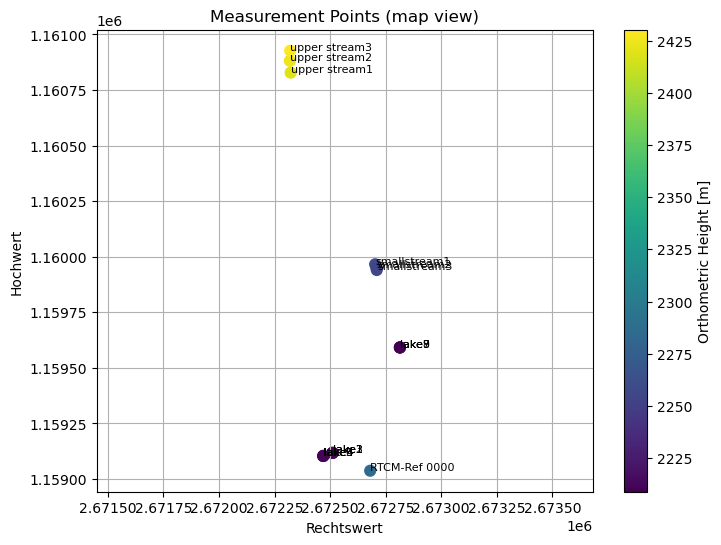

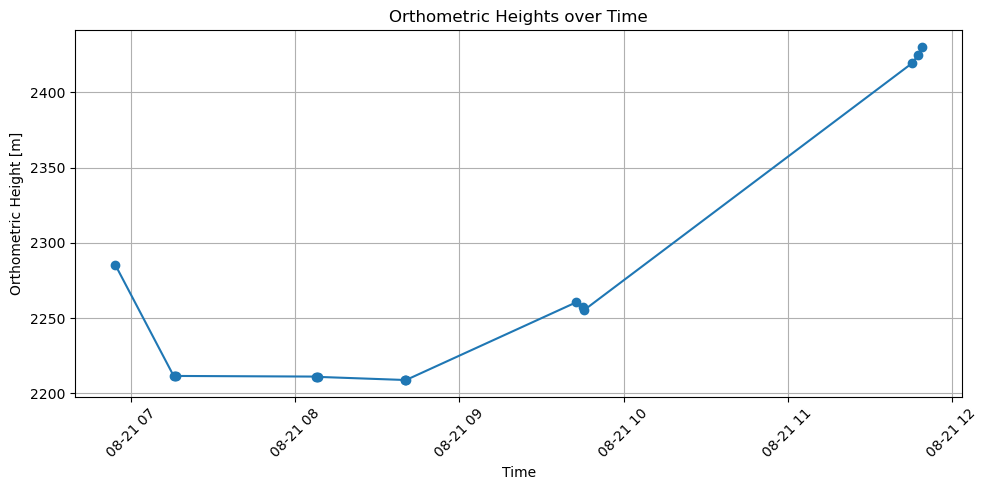

In [6]:
# === 3. Plot coordinates (map view) ===
plt.figure(figsize=(8,6))
plt.scatter(df["Rechtswert"], df["Hochwert"], c=df["Orthom. Höhe"], cmap="viridis", s=60)
for i, label in enumerate(df["Punkt Nr."]):
    plt.text(df["Rechtswert"][i]+1, df["Hochwert"][i]+1, label, fontsize=8)
plt.colorbar(label="Orthometric Height [m]")
plt.xlabel("Rechtswert")
plt.ylabel("Hochwert")
plt.title("Measurement Points (map view)")
plt.grid(True)
plt.axis("equal")   # keep scale ratio
plt.show()

# === 4. Plot heights over time ===
plt.figure(figsize=(10,5))
plt.plot(df["Datum/Uhrzeit"], df["Orthom. Höhe"], marker="o")
plt.xlabel("Time")
plt.ylabel("Orthometric Height [m]")
plt.title("Orthometric Heights over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()